In [ ]:
#imagenet datasets for images
from sklearn.datasets import make_circles

In [ ]:
n_samples=1000

x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

#x is features and y is labels

In [ ]:
len(x),len(y)

(1000, 1000)

In [ ]:
#make data frame
import pandas as pd
circles=pd.DataFrame({"x1": x[:,0],
                      "x2":x[:,1],
                      "label":y})

In [ ]:
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


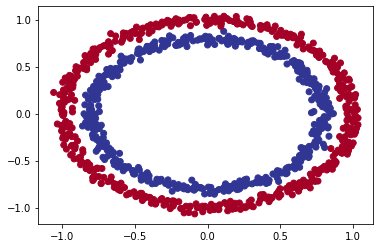

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#turn data into tensors
import torch
torch.__version__

'1.13.1+cu116'

In [ ]:
type(x)

numpy.ndarray

In [ ]:
X=torch.from_numpy(x).type(torch.float)
Y=torch.from_numpy(y).type(torch.float)

In [ ]:
#split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
#build model
import torch
from torch import nn

#device
device= 'cuda' if torch.cuda.is_available() else 'cpu'

device


'cuda'

In [ ]:
#construct model
class  CircleModel_0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2, out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  
  def forward(self,x):
    return self.layer_2(self.layer_1(x))

  
#send the model instance to the device
model_0=CircleModel_0().to(device)
model_0


CircleModel_0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
#replicate the model
#build it with nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0




Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()
#10 weights are seen 2*5


OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  untrained_pred=model_0(x_test.to(device))


x_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
torch.round(untrained_pred[:10])

tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

In [ ]:
# define loss and optimizer
# raw outputs of the model is logit 
# then we pass them to an activation function like sigmoid 
# sigmoid for binary crossentropy 
# softmax for multiclass crossentropy classification 
loss_fn=nn.BCEWithLogitsLoss() #binary cross entropy

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)
#it optimizes all the parameters of model to diminish the loss

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct =torch.eq(y_true,y_pred).sum().item()
  acc =(correct/len(y_pred))
  return acc
   

In [ ]:
# view logits
model_0.eval()
with torch.inference_mode():

  y_logits= model_0(x_test.to(device))[:5]
  
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_preds=torch.round(y_pred_probs)

y_pred_labels= torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
#training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoches=100

x_train, y_train=x_train.to(device), y_train.to(device)
x_test, y_test= x_test.to(device),y_test.to(device)

for epoch in range(epoches):
  #train
  model_0.train()

  #forward pass
  y_logits=model_0(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))


  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  
  optimizer.zero_grad()

   #back propagation
  loss.backward()

  #optimizer step-> update the parameters to reduce the gradient descent
  optimizer.step()


  model_0.eval()
  with torch.inference_mode():

    test_logits=model_0(x_test.squeeze())
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, test_pred)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)


  if epoch % 10 ==0:
    print(f"epoch:{epoch} | loss: {loss:.5f} , acc: {acc:.2f} % | test loss:{test_loss:.5f} ,test acc: {test_acc:.2f} %")





  

epoch:0 | loss: 0.69796 , acc: 0.52 % | test loss:0.63057 ,test acc: 100.00 %
epoch:10 | loss: 0.69590 , acc: 0.51 % | test loss:0.64599 ,test acc: 100.00 %
epoch:20 | loss: 0.69490 , acc: 0.52 % | test loss:0.65559 ,test acc: 100.00 %
epoch:30 | loss: 0.69435 , acc: 0.51 % | test loss:0.66228 ,test acc: 100.00 %
epoch:40 | loss: 0.69401 , acc: 0.51 % | test loss:0.66769 ,test acc: 100.00 %
epoch:50 | loss: 0.69378 , acc: 0.50 % | test loss:0.67216 ,test acc: 100.00 %
epoch:60 | loss: 0.69362 , acc: 0.50 % | test loss:0.67592 ,test acc: 100.00 %
epoch:70 | loss: 0.69351 , acc: 0.50 % | test loss:0.67910 ,test acc: 100.00 %
epoch:80 | loss: 0.69342 , acc: 0.50 % | test loss:0.68181 ,test acc: 100.00 %
epoch:90 | loss: 0.69336 , acc: 0.50 % | test loss:0.68411 ,test acc: 100.00 %


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("it already exists")
else:
  print("downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)



it already exists


In [ ]:
from helper_functions import  plot_predictions, plot_decision_boundary

In [ ]:
# improving models

# add more layers
# add hidden units
# change the learning rate
# change loss function
# change optimizer 


In [ ]:
class CircleModel_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2, out_features=10)
    self.layer_2= nn.Linear(in_features=10, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    #z=self.layer_1(x)
    #z=self.layer_2(z)
    #z=self.layer_3(z)
    #return z
    return  self.layer_3(self.layer_2(self.layer_1(x)))

model_1= CircleModel_1().to(device)
model_1

CircleModel_1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss function
loss_fn=nn.BCEWithLogitsLoss()
# optimizer
optimizer= torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [ ]:
#training 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoches=1000

x_train, y_train=x_train.to(device), y_train.to(device)
x_test, y_test= x_test.to(device),y_test.to(device)


for epoch in range(epoches):

  model_1.train()

  y_logits=model_1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc= accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #test
  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc= accuracy_fn(y_true=y_test,y_pred=test_pred)

#print
  if epoch % 10 == 0 :
    print(f"epoch:{epoch} | loss: {loss:.5f} , acc: {acc:.2f} % | test loss:{test_loss:.5f} ,test acc: {test_acc:.2f} %")



  





epoch:0 | loss: 0.69396 , acc: 0.51 % | test loss:0.69261 ,test acc: 0.51 %
epoch:10 | loss: 0.69369 , acc: 0.50 % | test loss:0.69270 ,test acc: 0.50 %
epoch:20 | loss: 0.69351 , acc: 0.50 % | test loss:0.69283 ,test acc: 0.49 %
epoch:30 | loss: 0.69339 , acc: 0.51 % | test loss:0.69297 ,test acc: 0.48 %
epoch:40 | loss: 0.69329 , acc: 0.50 % | test loss:0.69310 ,test acc: 0.49 %
epoch:50 | loss: 0.69322 , acc: 0.50 % | test loss:0.69324 ,test acc: 0.50 %
epoch:60 | loss: 0.69317 , acc: 0.49 % | test loss:0.69336 ,test acc: 0.52 %
epoch:70 | loss: 0.69312 , acc: 0.49 % | test loss:0.69348 ,test acc: 0.51 %
epoch:80 | loss: 0.69309 , acc: 0.50 % | test loss:0.69359 ,test acc: 0.50 %
epoch:90 | loss: 0.69307 , acc: 0.51 % | test loss:0.69370 ,test acc: 0.48 %
epoch:100 | loss: 0.69305 , acc: 0.50 % | test loss:0.69379 ,test acc: 0.48 %
epoch:110 | loss: 0.69303 , acc: 0.51 % | test loss:0.69388 ,test acc: 0.47 %
epoch:120 | loss: 0.69302 , acc: 0.51 % | test loss:0.69396 ,test acc: 0.47

In [ ]:
x_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [ ]:
x_test[:5],y_test[:5]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

In [ ]:
### build non linear model

class CircleModel_2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=32)
    self.layer_2=nn.Linear(in_features=32, out_features=32)
    self.layer_3=nn.Linear(in_features=32, out_features=32)
    self.layer_4=nn.Linear(in_features=32, out_features=1)
    self.relu=nn.ReLU()# it is the activation function which zeros all the negative inputs and makes non linear shapes 

  def forward(self,x):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3=CircleModel_2().to(device)
model_3


CircleModel_2(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=32, bias=True)
  (layer_4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
from torch.nn.modules.loss import BCEWithLogitsLoss
# loss and optimizer
loss_fn=BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_3.parameters(), lr=0.1)


In [ ]:
#training and testing
##seeds reproducability
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## check data and device
x_train,y_train= x_train.to(device), y_train.to(device)
x_test, y_test=x_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):
  model_3.train()

  y_logits=model_3(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc= accuracy_fn(y_true=y_train,y_pred=y_pred)


  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ###testing
  model_3.eval()
  with torch.inference_mode():
    logits=model_3(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(logits))

    loss=loss_fn(logits,y_test)
    test_acc= accuracy_fn(y_true=y_test,y_pred=test_pred)


    optimizer.zero_grad()

    

  if epoch % 100 == 0:
    print(f"epoch:{epoch} | loss: {loss:.5f} , acc: {acc:.2f} % | test loss:{test_loss:.5f} ,test acc: {test_acc:.2f} %")




epoch:0 | loss: 0.69305 , acc: 0.50 % | test loss:0.69468 ,test acc: 0.50 %
epoch:100 | loss: 0.69130 , acc: 0.54 % | test loss:0.69468 ,test acc: 0.57 %
epoch:200 | loss: 0.68978 , acc: 0.56 % | test loss:0.69468 ,test acc: 0.58 %
epoch:300 | loss: 0.68735 , acc: 0.57 % | test loss:0.69468 ,test acc: 0.59 %
epoch:400 | loss: 0.68317 , acc: 0.61 % | test loss:0.69468 ,test acc: 0.60 %
epoch:500 | loss: 0.67421 , acc: 0.77 % | test loss:0.69468 ,test acc: 0.79 %
epoch:600 | loss: 0.64984 , acc: 0.90 % | test loss:0.69468 ,test acc: 0.85 %
epoch:700 | loss: 0.54784 , acc: 0.99 % | test loss:0.69468 ,test acc: 0.98 %
epoch:800 | loss: 0.46812 , acc: 0.74 % | test loss:0.69468 ,test acc: 0.63 %
epoch:900 | loss: 0.33899 , acc: 0.88 % | test loss:0.69468 ,test acc: 0.80 %


In [ ]:
#evaluate
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(x_test))).squeeze()

y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

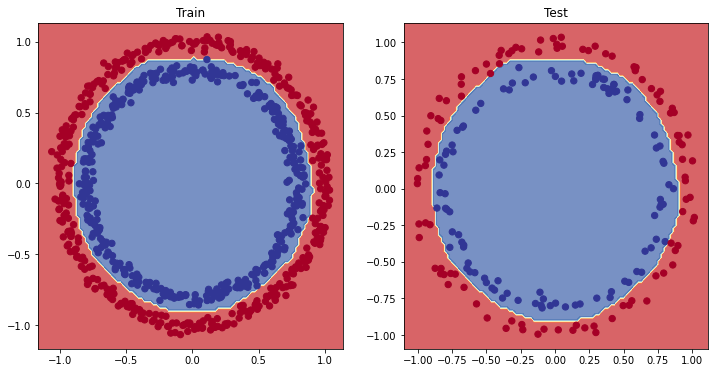

In [ ]:
#plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, x_train , y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, x_test, y_test)

In [ ]:
#replicate